<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/Data_preprocessing_and_data_visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries.
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

data=pd.read_csv('TitanicDataSet.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import numpy as np

mean=data['Age'].mean()
std=data['Age'].std()
is_null=data['Age'].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
data['Age'][np.isnan(data['Age'])]=rand_age


 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#drop non usefull variables that have not any effect on our prediction.
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [ ]:
#fill the missing values of Embarked column with the mode.
data['Embarked'] = data['Embarked'].fillna(data.Embarked.mode()[0])

In [ ]:
#remplace missing values of Cabin column.
data['Cabin'] = data['Cabin'].replace(np.nan, 'X')
data['Cabin'] = data['Cabin'].astype(str).str[0]

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
#transform Survived feature to numerical ones.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])

In [ ]:
#replace male as 0 and female as 1.
gender ={'Sex' : {'male':0, 'female':1} }
data.replace(gender, inplace=True)

In [ ]:
#transform Embarked feature to numerical ones.
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,X,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,X,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,X,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,X,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,30.0,1,2,23.4500,X,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1


In [ ]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,X,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,X,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,X,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,X,0,Rev
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,B,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,30.0,1,2,23.4500,X,0,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1,Mr


In [ ]:
#transform Embarked feature to numerical ones.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "X": 8}
data['Cabin'] = data['Cabin'].map(deck)

In [ ]:
#transform type of Fare feature from float to int.
data['Fare'] = data['Fare'].astype(int)

In [ ]:
#as you have seen, there are a lot of titles which make the feature very impractical.
#let's try to group these titles into more useful ones.
Title_Dictionary = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer" , "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty","Lady" :"Royalty", 
                    "the Countess" :"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss" :"Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" :"Mrs" , "Master" :"Master"}
#replace values of Title column with new values of Title_Dictionary.
data['Title']=data.Title.replace(Title_Dictionary)

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,8.0,0,Mrs
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,3.0,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,8.0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,3.0,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,8.0,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13,8.0,0,Officer
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30,2.0,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,30.0,1,2,23,8.0,0,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30,3.0,1,Mrs


None


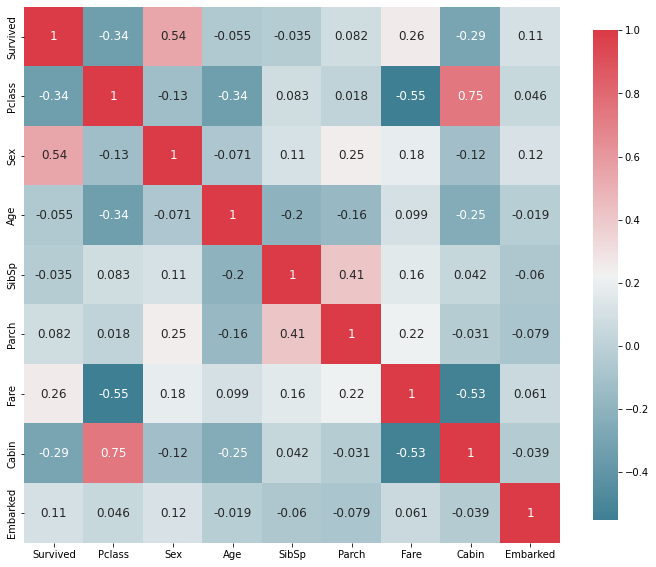

In [ ]:
def plot_correlation_map( data ):

    corr = data.corr()
    # is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded.
     #For any non-numeric data type columns in the dataframe it is ignored.

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap,square=True,  cbar_kws={ 'shrink' : .9 },ax=ax, annot = True,  annot_kws = { 'fontsize' : 12 } )
print(plot_correlation_map(data))
#This function gives us the coefficients of correlation between the different features in form of a matrix. 
#The elements on the diagonal are the coefficients of correlation between the same feature.
#if the value in the matrix is positive then we have a correlation in the same direction 
#otherwise we have a correlation in the opposite direction.
#if the value is close to 0 then there is no correlation between these two features.

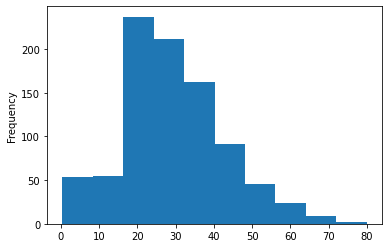

In [ ]:
#the distribution of Age feature.
import matplotlib.pyplot as plt
data['Age'].plot.hist()

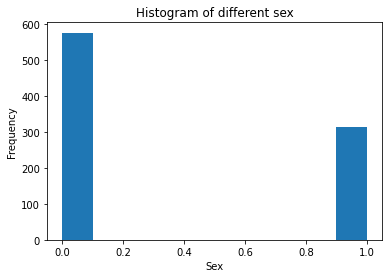

In [ ]:
#the distribution of Sex feature.
plt.title('Histogram of different sex')
plt.xlabel('Sex')
data['Sex'].plot.hist()

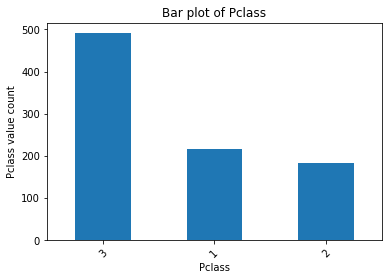

In [ ]:
#the distribution of Pclass feature.
plt.xlabel('Pclass')
plt.ylabel('Pclass value count')
plt.title('Bar plot of Pclass')
newdata=data['Pclass'].value_counts()
newdata.plot.bar(rot=45)

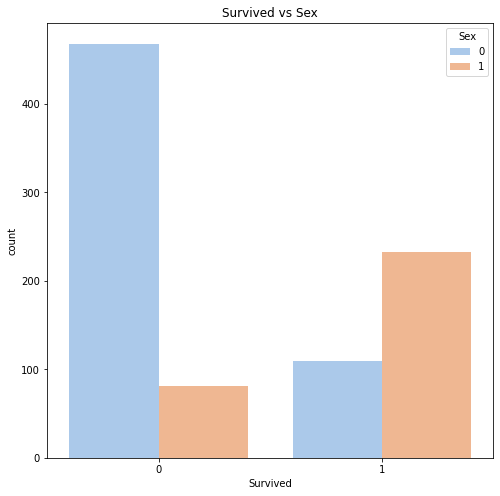

In [ ]:
#the correlation between Survived and Sex.
plt.figure(figsize=(8,8))
sns.countplot(x='Survived',hue='Sex' ,data=data, palette='pastel')
plt.title('Survived vs Sex')
plt.show()

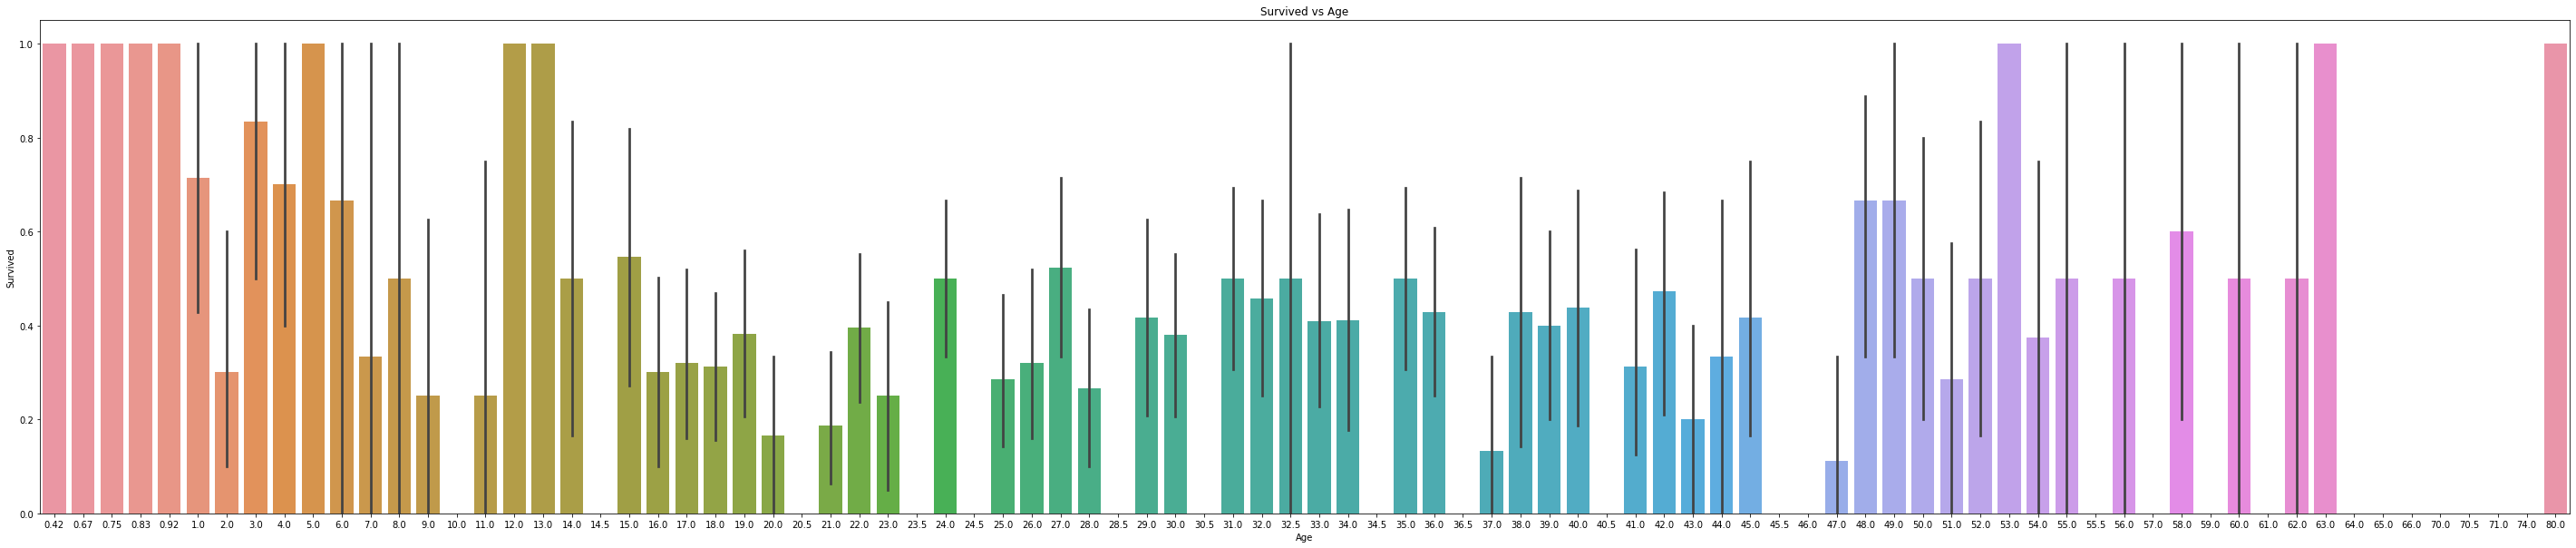

In [ ]:
#the correlation between Survived and Age.
plt.figure(figsize=(50, 10))
sns.barplot(x='Age', y='Survived', data=data)
plt.title('Survived vs Age')
plt.show()

Text(0.5, 1.0, 'Survived vs Pclass')

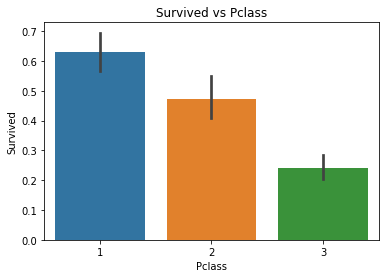

In [ ]:
#the correlation between Pclass and Survived.
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survived vs Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


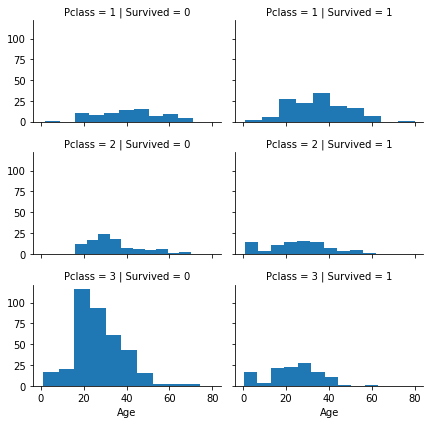

In [ ]:
#the correlation between three features: Age, Pclass and Survived.
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2, aspect=1.5)
grid.map(plt.hist, 'Age', bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2160x720 with 0 Axes>

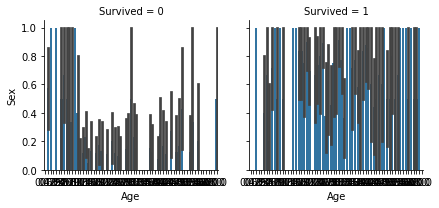

In [ ]:
#the correlation between Sex and Age and their importance in the survival of the individuals.
plt.figure(figsize=(30,10))
grid = sns.FacetGrid(data, col='Survived', )
grid.map(sns.barplot, 'Age', 'Sex')
grid.add_legend()
plt.show()

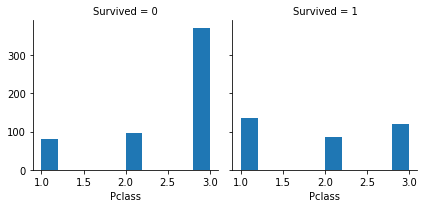

In [ ]:
#the correlation between Survived and Pclass.
g= sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Pclass')

In [ ]:
#create a new feature called Family_size using the Parch and the SibSp columns.
data['Family_size'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
#we can see the correlation between the two features Family_size and Survived and the impact of Family_size on the number of survivors.
fsize= data[['Family_size','Survived']].groupby(['Family_size'], as_index = False).mean()
print(fsize)

   Family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


In [ ]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


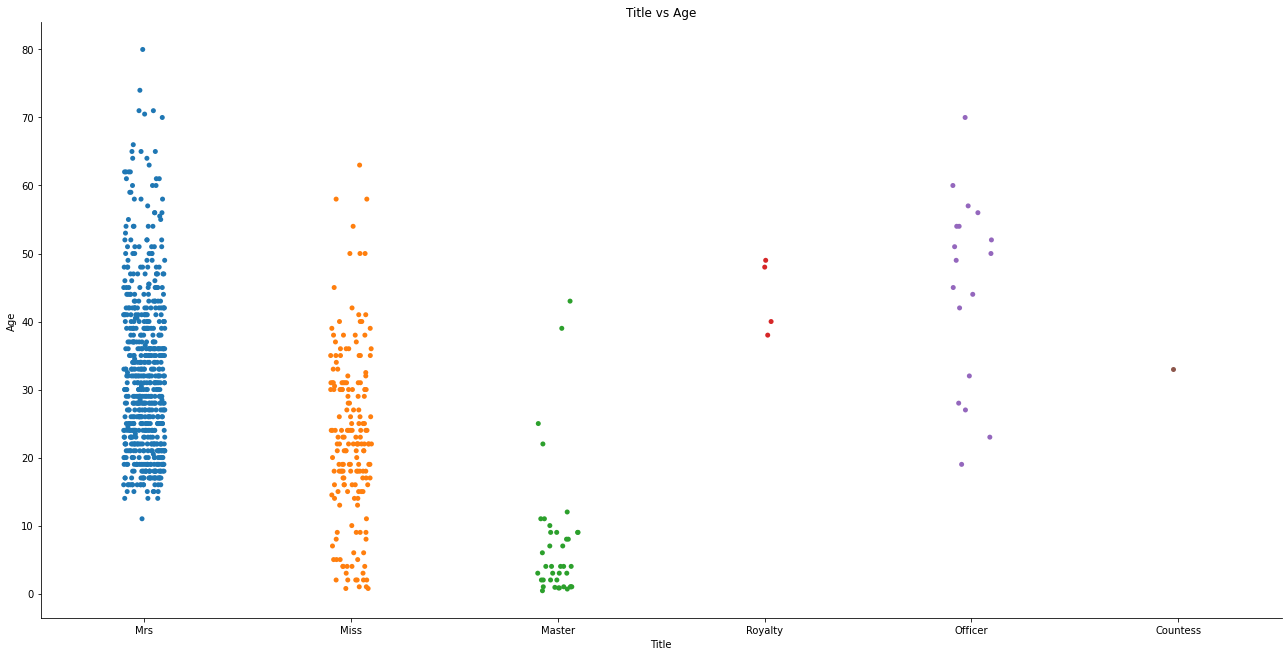

In [ ]:
#the correlation between Title and Age.
sns.catplot(x='Title', y='Age', data=data , height=9, aspect=18/9)
plt.title('Title vs Age')
plt.show()

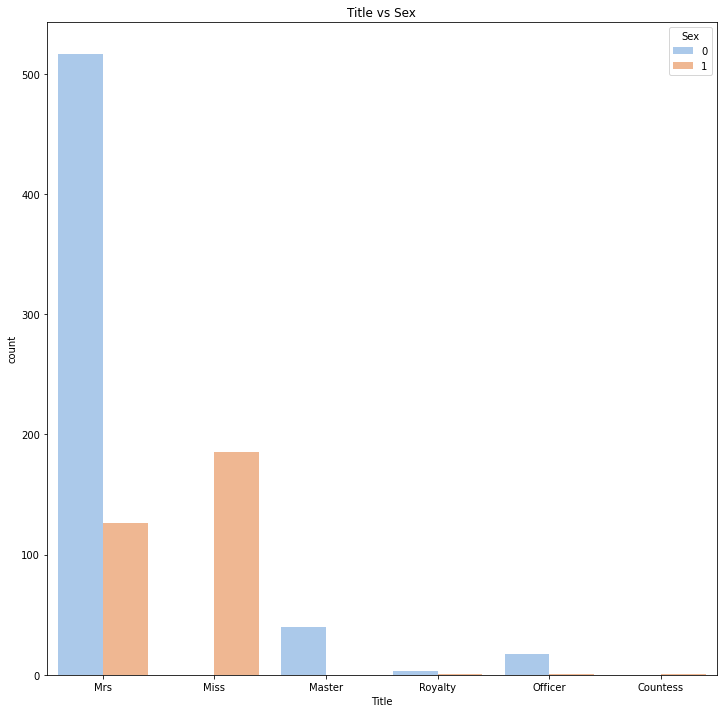

In [ ]:
#the correlation between Title and Sex.
plt.figure(figsize=(12,12))
sns.countplot(x='Title', hue='Sex', data=data, palette='pastel')
plt.title('Title vs Sex')
plt.show()

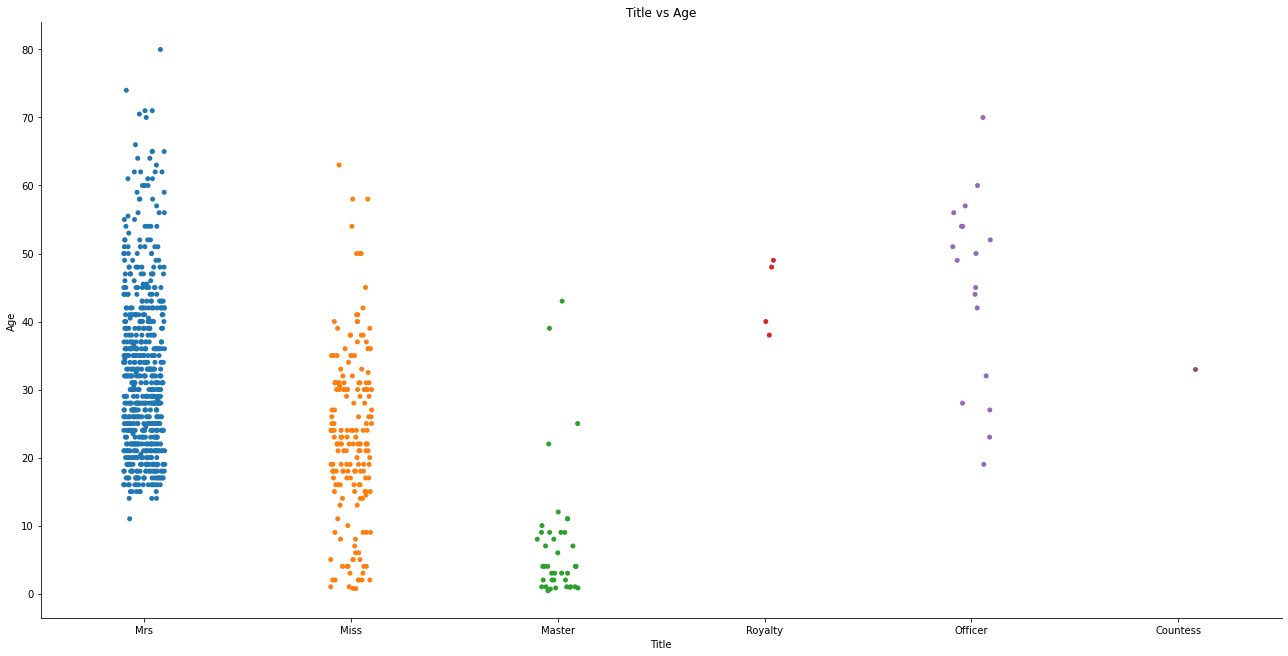

In [ ]:
#the correlation between Title and Age.
sns.catplot(x="Title", y="Age", data=data , height=9, aspect=18/9)
plt.title('Title vs Age')
plt.show()

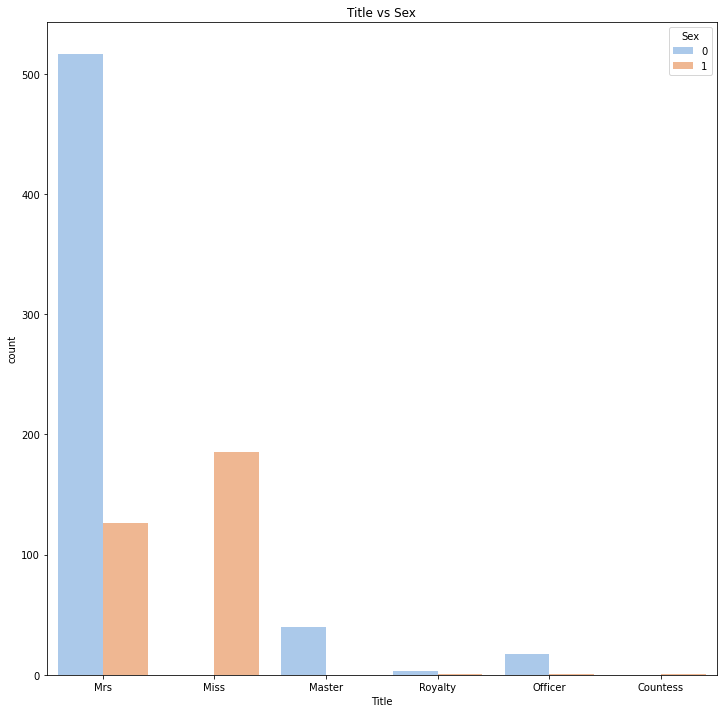

In [ ]:
#the correlation between Title and Sex.
plt.figure(figsize=(12,12))
sns.countplot(x='Title', hue='Sex', data=data, palette='pastel')
plt.title('Title vs Sex')
plt.show()